6351071049_Lab2_Bài 2(15-16)

In [ ]:
print("Trần Khôi Nguyên_6351071049")

# Cài đặt và import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

# Hàm banner in tên sinh viên mỗi câu
def banner():
    print("\nTrần Khôi Nguyên_6351071049\n")

# Hàm vẽ heatmap confusion matrix
def plot_cm(cm, labels, title):
    banner()
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Trần Khôi Nguyên_6351071049


In [ ]:
banner()
print("Câu 1: Nhập dữ liệu & hiển thị số lượng bản ghi")

uploaded = files.upload()

# Tìm tên file
train_file = None
test_file = None

for fn in uploaded.keys():
    if "data" in fn.lower():
        train_file = fn
    if "test" in fn.lower():
        test_file = fn

cols = ["age","workclass","fnlwgt","education","education-num","marital-status",
        "occupation","relationship","race","sex","capital-gain","capital-loss",
        "hours-per-week","native-country","Income"]

train = pd.read_csv(train_file, header=None, names=cols, na_values="?", skipinitialspace=True)
test = pd.read_csv(test_file, header=None, names=cols, na_values="?", skipinitialspace=True)

# Xử lý ký tự '.' trong file test
test["Income"] = test["Income"].astype(str).str.replace(".", "", regex=False).str.strip()

print("Số dữ liệu train:", train.shape[0])
print("Số dữ liệu test:", test.shape[0])



Trần Khôi Nguyên_6351071049

Câu 1: Nhập dữ liệu & hiển thị số lượng bản ghi


Saving adult.data.csv to adult.data (2).csv
Saving adult.test.csv to adult.test (2).csv
Số dữ liệu train: 32562
Số dữ liệu test: 16282


In [ ]:
banner()
print("Câu 2: Tiền xử lý dữ liệu")

train_clean = train.dropna()
test_clean = test.dropna()

# Xóa cột fnlwgt như đề bài
train_clean = train_clean.drop(columns=["fnlwgt"])
if "fnlwgt" in test_clean.columns:
    test_clean = test_clean.drop(columns=["fnlwgt"])

# Nối dữ liệu
data = pd.concat([train_clean, test_clean], ignore_index=True)

print("Dữ liệu train sau khi làm sạch:", train_clean.shape)
print("Dữ liệu test sau khi làm sạch:", test_clean.shape)
print("Tổng dữ liệu sau khi nối:", data.shape)



Trần Khôi Nguyên_6351071049

Câu 2: Tiền xử lý dữ liệu
Dữ liệu train sau khi làm sạch: (30163, 14)
Dữ liệu test sau khi làm sạch: (15061, 14)
Tổng dữ liệu sau khi nối: (45224, 14)



Trần Khôi Nguyên_6351071049

Câu 3: Ma trận tương quan Pearson


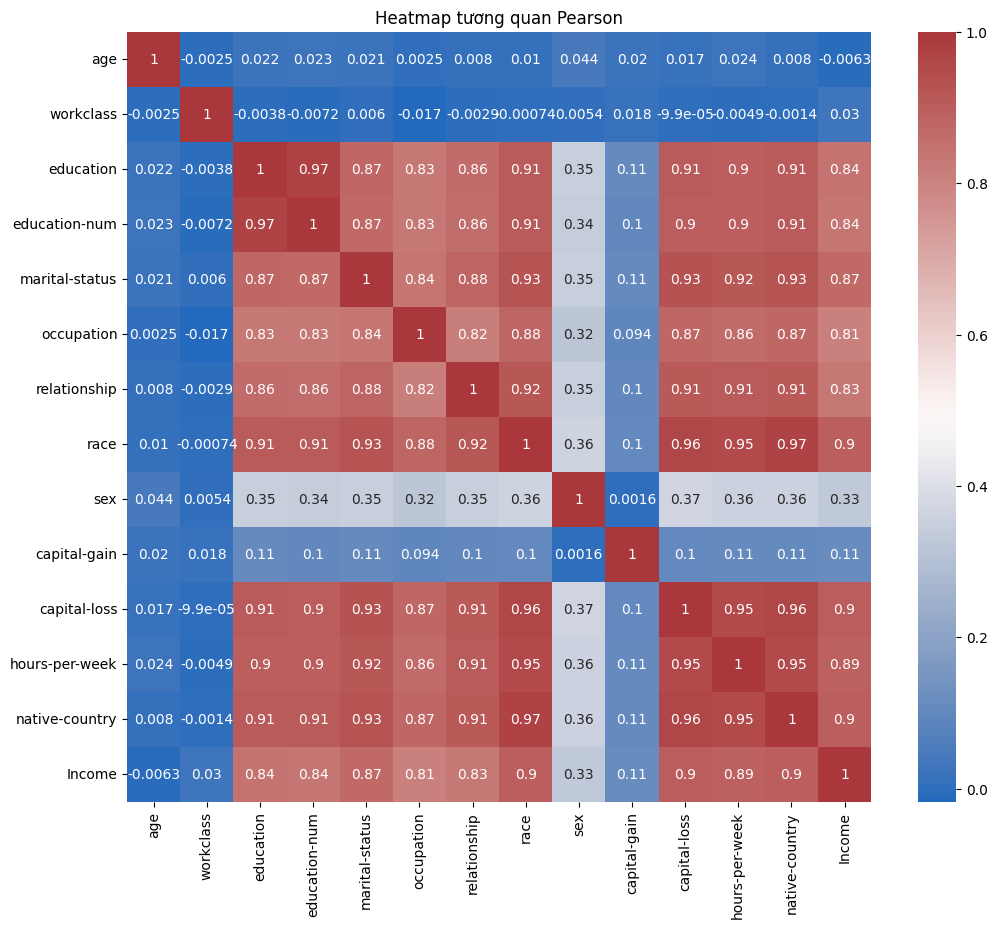

Không có cột nào tương quan quá cao -> không loại cột.


In [ ]:
banner()
print("Câu 3: Ma trận tương quan Pearson")

df_corr = data.copy()

# Chuyển các cột object thành số để tính Pearson
for col in df_corr.columns:
    if df_corr[col].dtype == "object":
        df_corr[col] = pd.factorize(df_corr[col])[0]

corr = df_corr.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="vlag")
plt.title("Heatmap tương quan Pearson")
plt.show()

print("Không có cột nào tương quan quá cao -> không loại cột.")


In [ ]:
banner()
print("Câu 4: Tách features và labels")

features = data.drop(columns=["Income"])
labels = data["Income"]

print("Kích thước features:", features.shape)
print("Kích thước labels:", labels.shape)



Trần Khôi Nguyên_6351071049

Câu 4: Tách features và labels
Kích thước features: (45224, 13)
Kích thước labels: (45224,)


In [ ]:
banner()
print("Câu 5: One-hot encoding cho categorical columns")

non_numeric = features.select_dtypes(include=["object"]).columns.tolist()
print("Các cột cần one-hot:", non_numeric)

features_ohe = pd.get_dummies(features, columns=non_numeric)

print("Kích thước sau one-hot:", features_ohe.shape)
features_ohe.head()



Trần Khôi Nguyên_6351071049

Câu 5: One-hot encoding cho categorical columns
Các cột cần one-hot: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Kích thước sau one-hot: (45224, 881)


,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_income,native-country_native-country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
banner()
print("Câu 6: Tách lại dữ liệu thành train/test")

n_train = train_clean.shape[0]
n_test = test_clean.shape[0]

X_train = features_ohe.iloc[:n_train]
X_test  = features_ohe.iloc[n_train:]
y_train = labels.iloc[:n_train]
y_test  = labels.iloc[n_train:]

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Trần Khôi Nguyên_6351071049

Câu 6: Tách lại dữ liệu thành train/test
X_train: (30163, 881)
X_test: (15061, 881)
y_train: (30163,)
y_test: (15061,)



Trần Khôi Nguyên_6351071049

Câu 7: Cây quyết định ID3 (entropy)
Accuracy ID3: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00       0.0
        >50K       0.00      0.00      0.00       0.0
         nan       0.00      0.00      0.00   15061.0

    accuracy                           0.00   15061.0
   macro avg       0.00      0.00      0.00   15061.0
weighted avg       0.00      0.00      0.00   15061.0


Trần Khôi Nguyên_6351071049



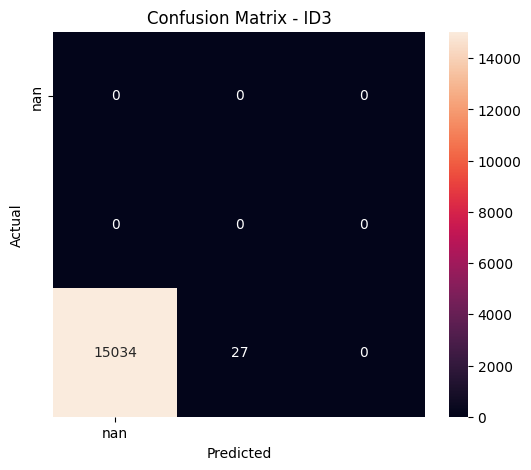

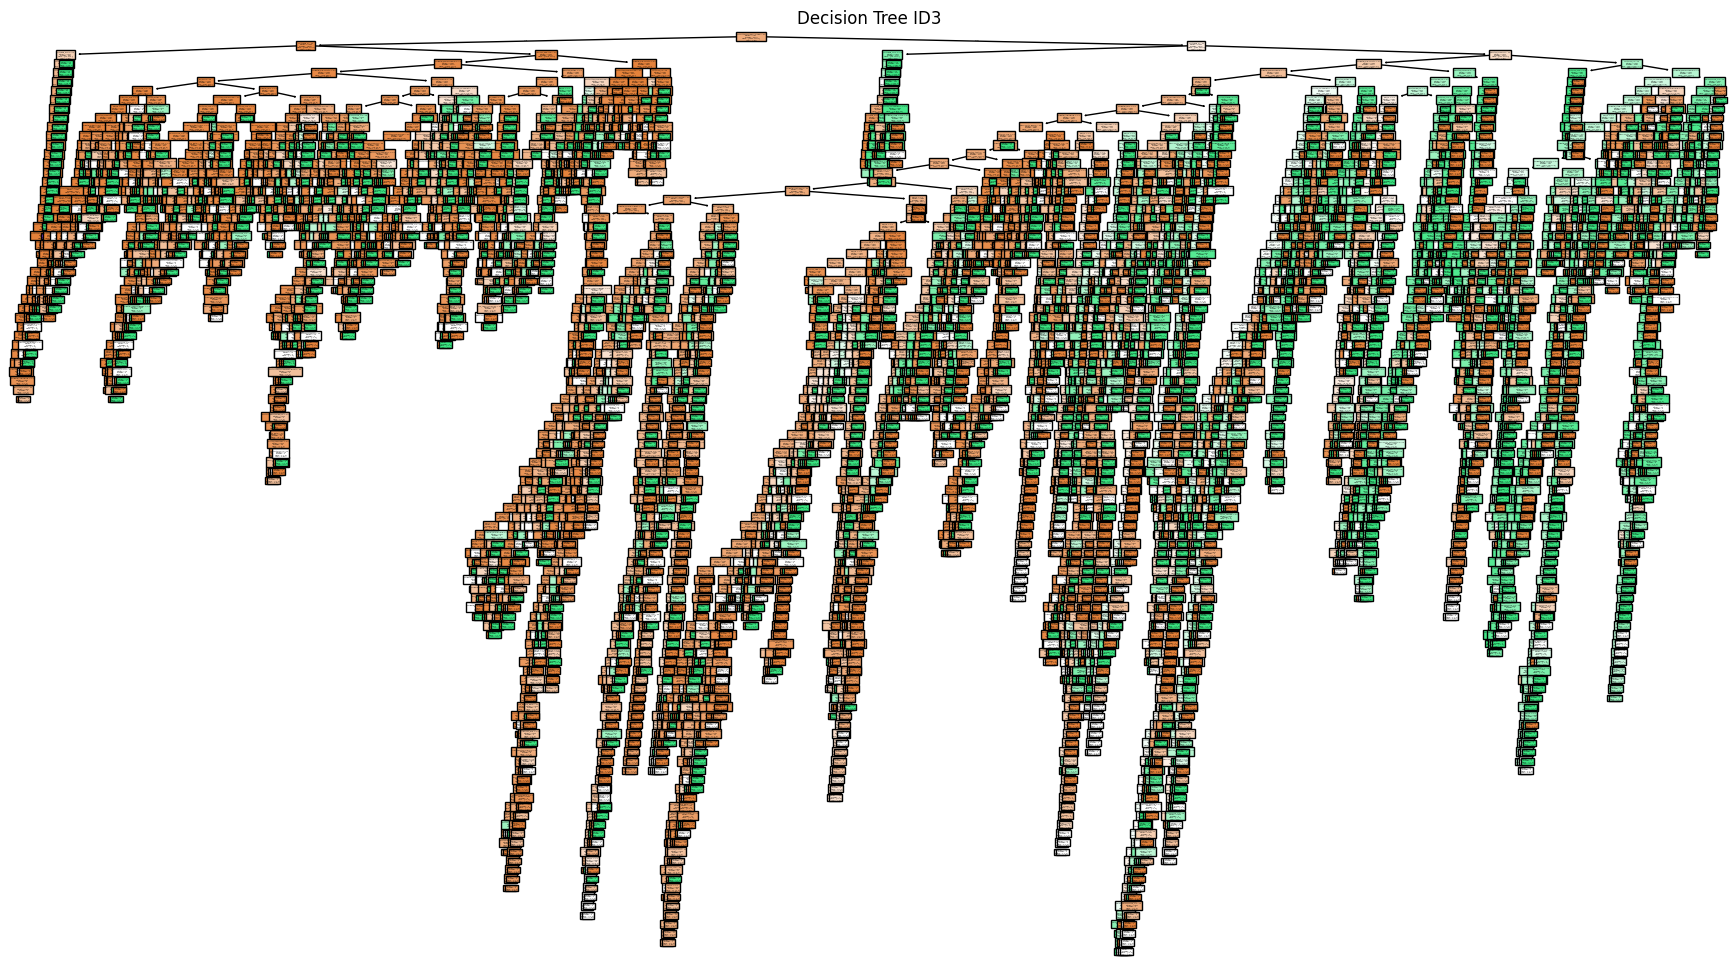

In [ ]:
banner()
print("Câu 7: Cây quyết định ID3 (entropy)")

clf_id3 = DecisionTreeClassifier(criterion="entropy")
clf_id3.fit(X_train, y_train)

y_pred_id3 = clf_id3.predict(X_test)

print("Accuracy ID3:", accuracy_score(y_test, y_pred_id3))
print(classification_report(y_test, y_pred_id3))

cm_id3 = confusion_matrix(y_test, y_pred_id3)
plot_cm(cm_id3, np.unique(y_test), "Confusion Matrix - ID3")

plt.figure(figsize=(22,12))
plot_tree(clf_id3, feature_names=X_train.columns, class_names=np.unique(y_train), filled=True)
plt.title("Decision Tree ID3")
plt.show()



Trần Khôi Nguyên_6351071049

Câu 8: Cây CART (gini)
Accuracy CART: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00       0.0
        >50K       0.00      0.00      0.00       0.0
         nan       0.00      0.00      0.00   15061.0

    accuracy                           0.00   15061.0
   macro avg       0.00      0.00      0.00   15061.0
weighted avg       0.00      0.00      0.00   15061.0


Trần Khôi Nguyên_6351071049



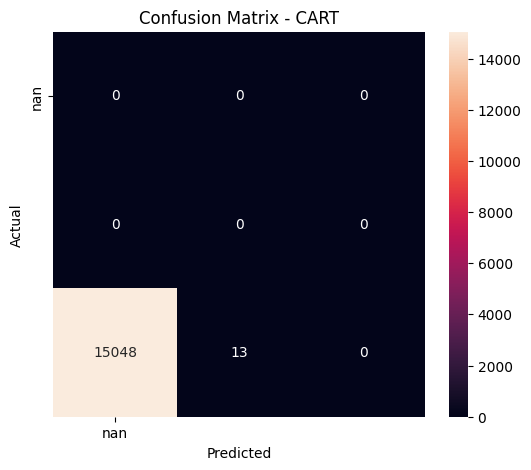

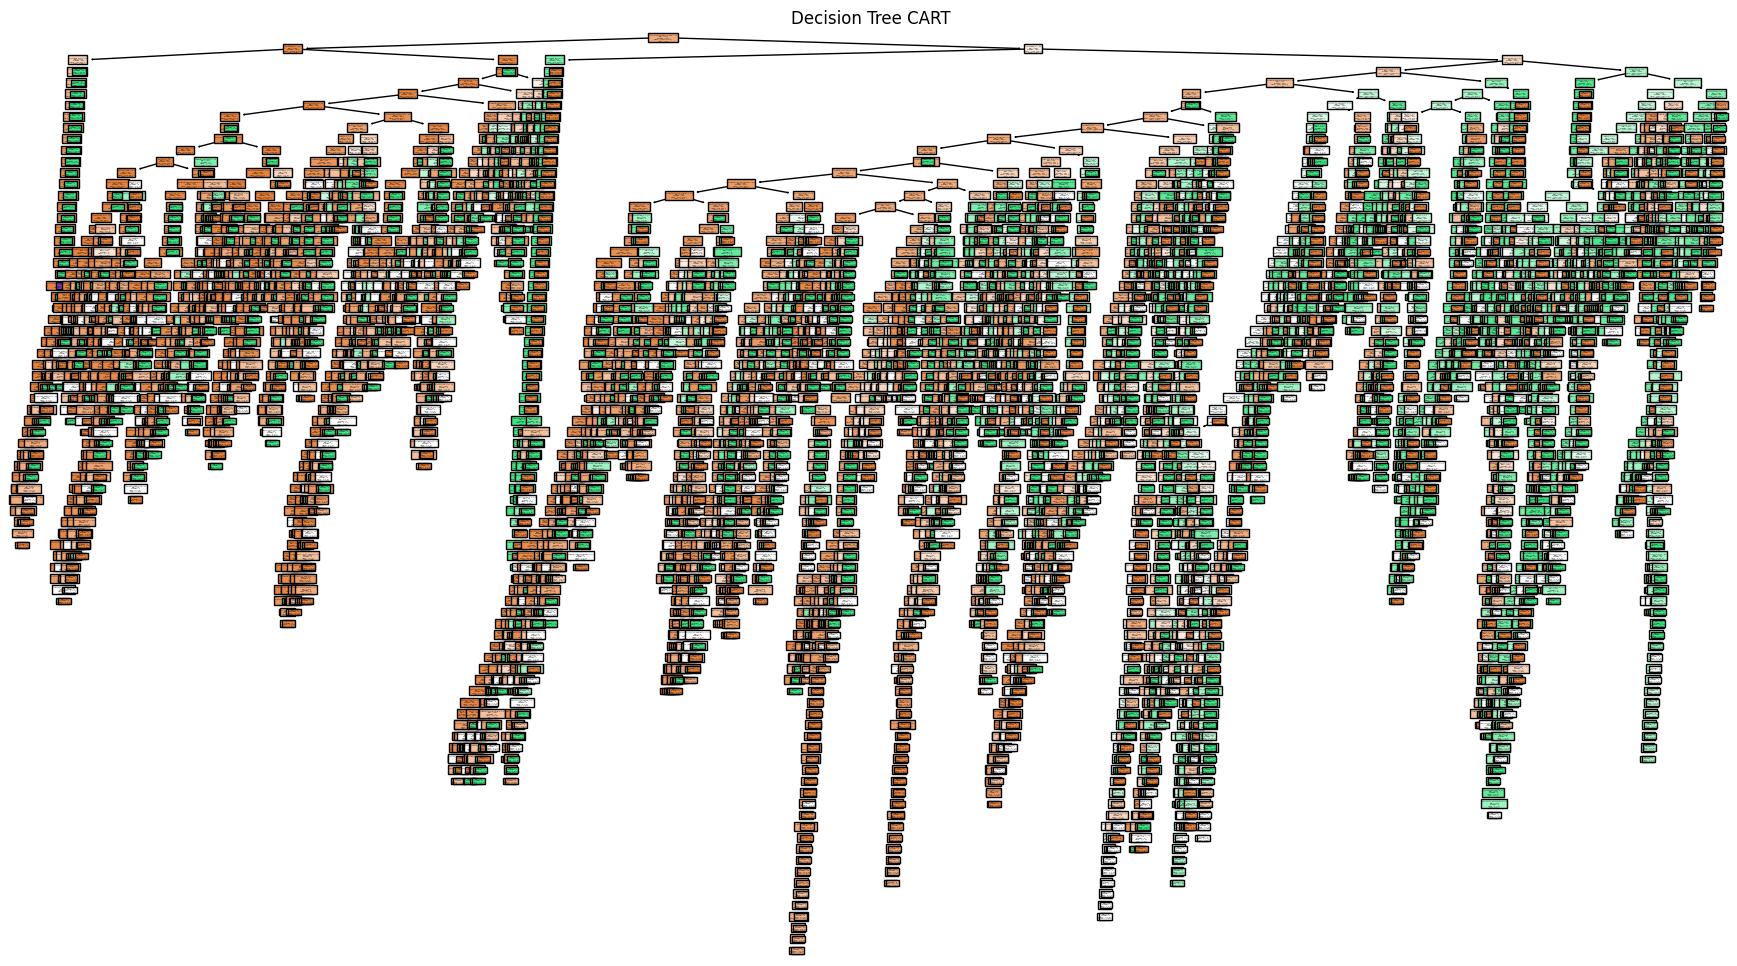

In [ ]:
banner()
print("Câu 8: Cây CART (gini)")

clf_cart = DecisionTreeClassifier(criterion="gini")
clf_cart.fit(X_train, y_train)

y_pred_cart = clf_cart.predict(X_test)

print("Accuracy CART:", accuracy_score(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

cm_cart = confusion_matrix(y_test, y_pred_cart)
plot_cm(cm_cart, np.unique(y_test), "Confusion Matrix - CART")

plt.figure(figsize=(22,12))
plot_tree(clf_cart, feature_names=X_train.columns, class_names=np.unique(y_train), filled=True)
plt.title("Decision Tree CART")
plt.show()



Trần Khôi Nguyên_6351071049

Câu 9: Naive Bayes
Accuracy NB: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00       0.0
        >50K       0.00      0.00      0.00       0.0
         nan       0.00      0.00      0.00   15061.0

    accuracy                           0.00   15061.0
   macro avg       0.00      0.00      0.00   15061.0
weighted avg       0.00      0.00      0.00   15061.0


Trần Khôi Nguyên_6351071049



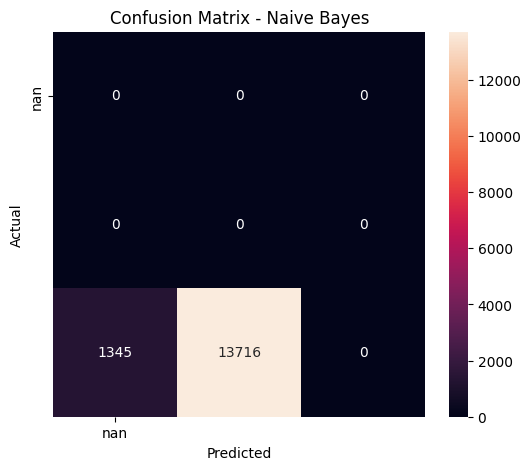


Trần Khôi Nguyên_6351071049

Câu 10: So sánh kết quả


,Model,Accuracy
0,ID3,0.0
1,CART,0.0
2,Naive Bayes,0.0



Mô hình tốt nhất: ID3 -> Accuracy = 0.0


In [ ]:
banner()
print("Câu 9: Naive Bayes")

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Accuracy NB:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_cm(cm_nb, np.unique(y_test), "Confusion Matrix - Naive Bayes")

banner()
print("Câu 10: So sánh kết quả")

results = pd.DataFrame({
    "Model": ["ID3", "CART", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_id3),
        accuracy_score(y_test, y_pred_cart),
        accuracy_score(y_test, y_pred_nb)
    ]
})

display(results.sort_values(by="Accuracy", ascending=False))

best = results.loc[results["Accuracy"].idxmax()]
print("\nMô hình tốt nhất:", best["Model"], "-> Accuracy =", best["Accuracy"])
